In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

plt.rc('axes', titlesize=20)
plt.rc('figure', figsize=(16, 10))

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)
cases_df = df.loc[:, ["cases", "deaths"]]
tests_df = df.loc[:, ["test_positive", "test_total"]]

evolution_df = df.diff()[["cases", "deaths", "test_total"]].iloc[1:]

In [3]:
smas = pd.DataFrame()
smas["cases_SMA_7"] = evolution_df["cases"].rolling(window=7).mean()
smas["cases_SMA_21"] = evolution_df["cases"].rolling(window=21).mean()

smas["deaths_SMA_7"] = evolution_df["deaths"].rolling(window=7).mean()
smas["deaths_SMA_21"] = evolution_df["deaths"].rolling(window=21).mean()

def to_pct_string(frame):
    new_frame = pd.DataFrame()
    for column in frame.columns:
        new_frame[column] = pd.Series(["{0:.2f}%".format(val * 100) for val in frame[column]], index = frame.index)
    return new_frame

# Evolution Charts

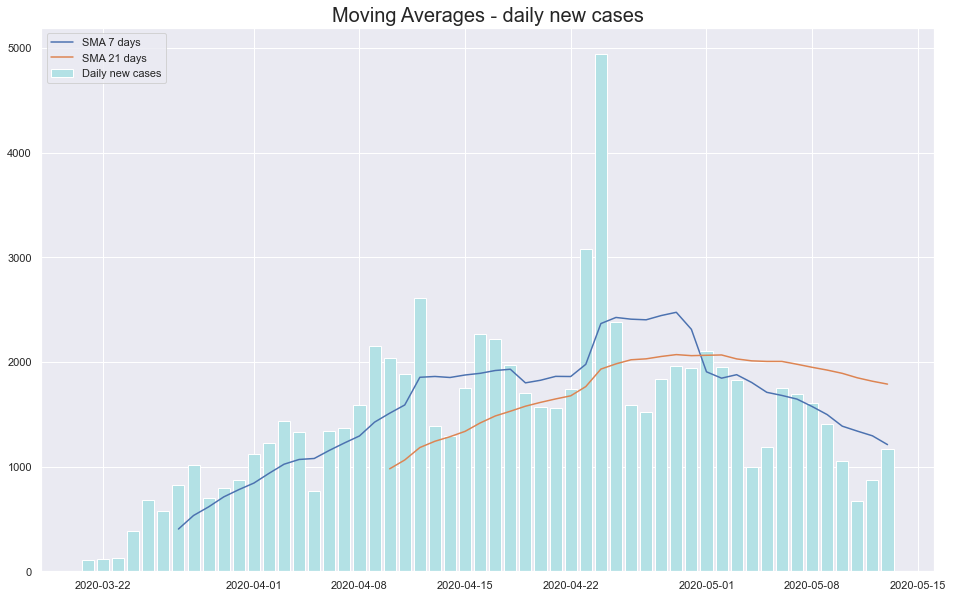

In [4]:
plt.plot(smas["cases_SMA_7"], label="SMA 7 days")
plt.plot(smas["cases_SMA_21"], label="SMA 21 days")
plt.bar(evolution_df.index, evolution_df["cases"], label="Daily new cases", color="#b3e1e5")
plt.legend(loc=2)
plt.title("Moving Averages - daily new cases")
plt.show()

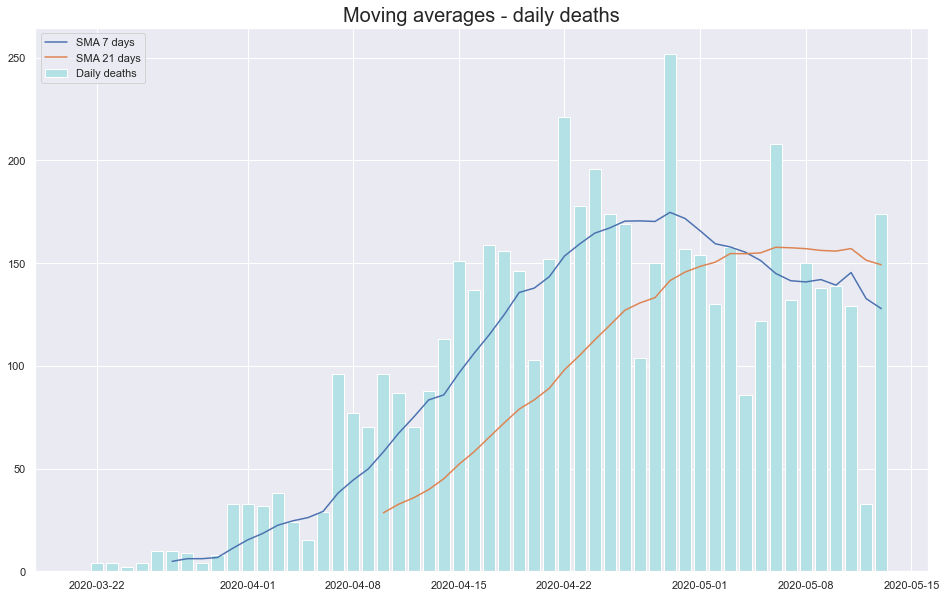

In [5]:
plt.plot(smas["deaths_SMA_7"], label="SMA 7 days")
plt.plot(smas["deaths_SMA_21"], label="SMA 21 days")
plt.bar(evolution_df.index, evolution_df["deaths"], label="Daily deaths", color="#b3e1e5")
plt.legend(loc=2)
plt.title("Moving averages - daily deaths")
plt.show()

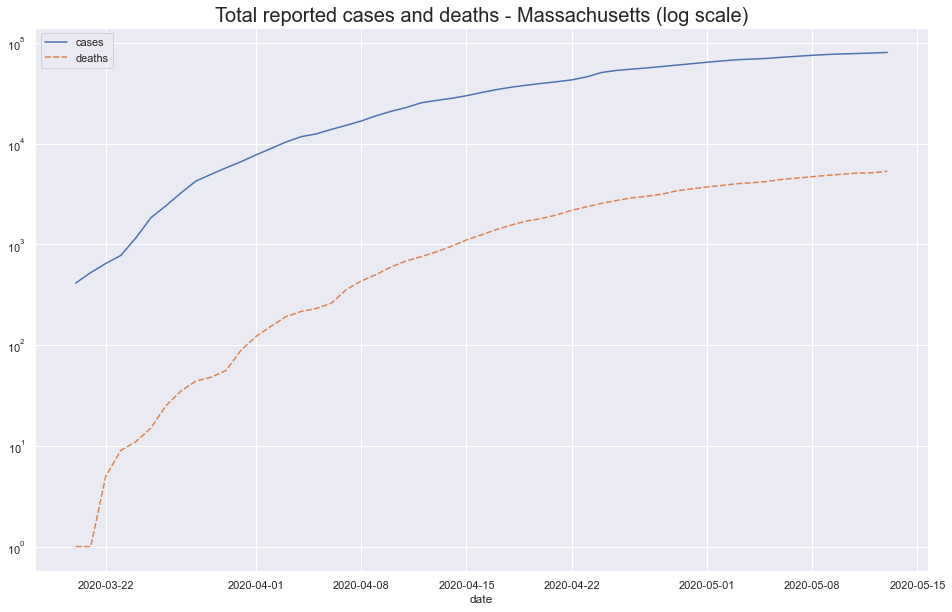

In [6]:
# plt.figure(figsize=(16, 10))
ax = sns.lineplot(data=cases_df)
ax.set_yscale("log")

plt.title("Total reported cases and deaths - Massachusetts (log scale)")

plt.show()

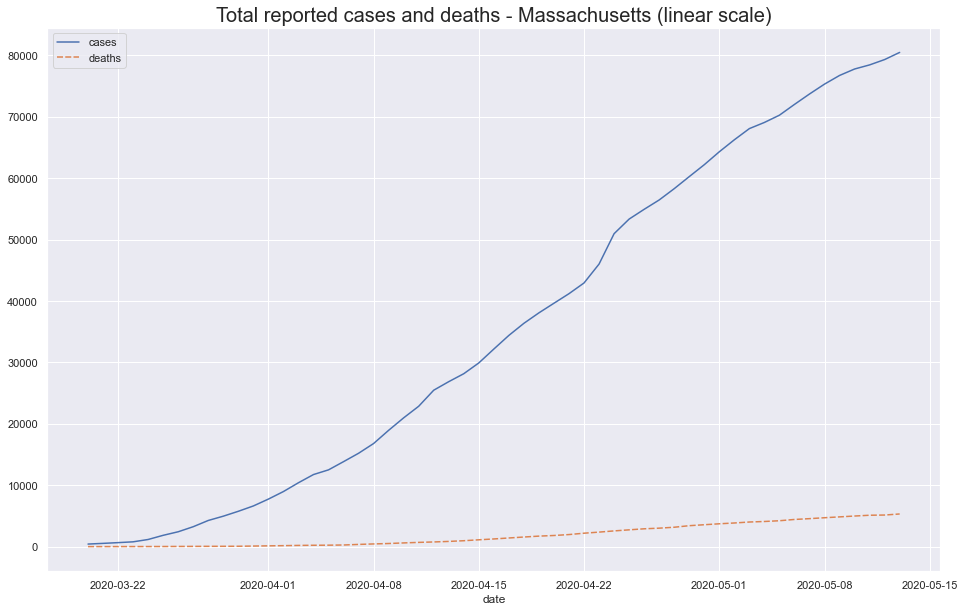

In [7]:
ax = sns.lineplot(data=cases_df)
ax.set_yscale("linear")

plt.title("Total reported cases and deaths - Massachusetts (linear scale)")

plt.show()

In [8]:
to_pct_string(smas.pct_change().iloc[-21:])

,cases_SMA_7,cases_SMA_21,deaths_SMA_7,deaths_SMA_21
date,,,,
2020-04-23,6.26%,5.26%,3.82%,7.09%
2020-04-24,19.69%,9.47%,3.32%,7.16%
2020-04-25,2.47%,2.58%,1.56%,6.35%
2020-04-26,-0.68%,1.99%,1.97%,6.13%
2020-04-27,-0.25%,0.44%,0.08%,2.81%
2020-04-28,1.69%,1.11%,-0.17%,1.97%
2020-04-29,1.27%,0.87%,2.60%,6.26%
2020-04-30,-6.58%,-0.49%,-1.72%,2.93%
2020-05-01,-17.55%,0.17%,-3.49%,1.90%


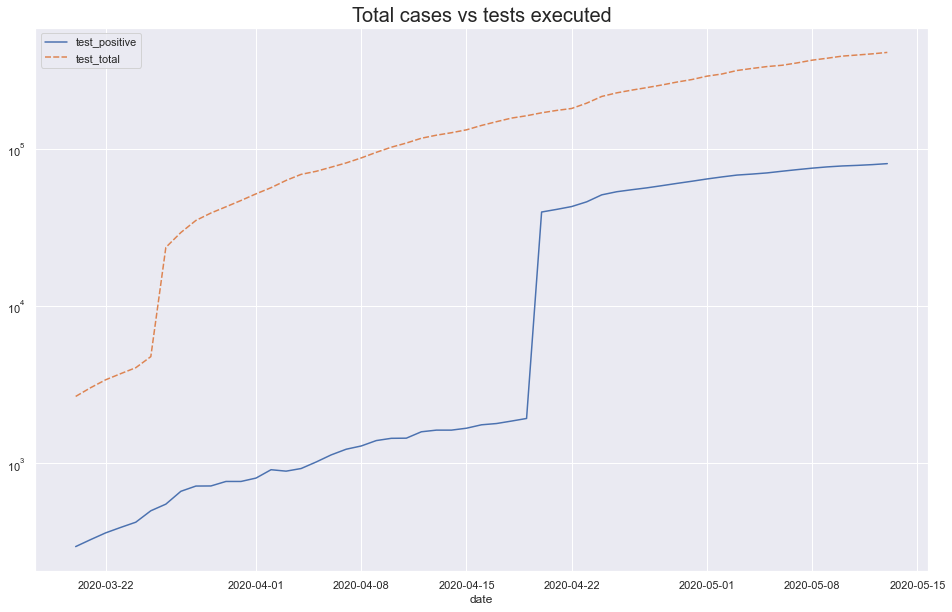

In [9]:
ax = sns.lineplot(data=tests_df)
ax.set_yscale("log")

plt.title("Total cases vs tests executed")

plt.show()

   # Data for the past week

## Daily new cases

In [10]:
evolution_df.iloc[-7:]

,cases,deaths,test_total
date,,,
2020-05-07,1696.0,132.0,11993.0
2020-05-08,1612.0,150.0,14391.0
2020-05-09,1410.0,138.0,10514.0
2020-05-10,1050.0,139.0,11852.0
2020-05-11,669.0,129.0,6339.0
2020-05-12,870.0,33.0,6768.0
2020-05-13,1165.0,174.0,8536.0


## Daily percent change

In [11]:
to_pct_string(df.pct_change().iloc[-7:])

,cases,deaths,test_positive,test_total
date,,,,
2020-05-07,2.35%,2.99%,2.35%,3.53%
2020-05-08,2.19%,3.30%,2.19%,4.09%
2020-05-09,1.87%,2.93%,1.87%,2.87%
2020-05-10,1.37%,2.87%,1.37%,3.15%
2020-05-11,0.86%,2.59%,0.86%,1.63%
2020-05-12,1.11%,0.65%,1.11%,1.71%
2020-05-13,1.47%,3.38%,1.47%,2.13%
